In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hear = pd.read_csv('hearing_test.csv')

In [3]:
hear

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [4]:
#Getting general information
hear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


there are 5000rows and 3 columns

In [5]:
hear.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


the minimum age is 18 and the maximum age is 90 which makes the spread of the data to be small

Checking for null values and duplicates

In [6]:
hear.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [7]:
hear.duplicated().sum()

1470

In [8]:
hear.drop_duplicates(inplace = True)

<AxesSubplot:xlabel='physical_score', ylabel='age'>

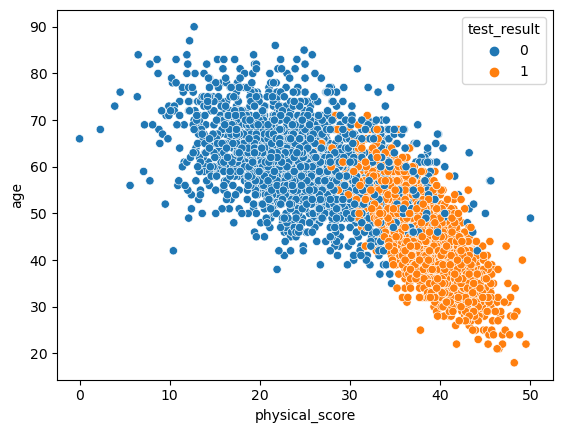

In [9]:
sns. scatterplot(x = hear.physical_score, y = hear.age, hue = hear.test_result)

In [10]:
hear['test_result'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       0
3       0
4       1
       ..
4992    0
4993    1
4995    0
4996    1
4998    1
Name: test_result, Length: 3530, dtype: int64>

In [11]:
#Feature selection
cols_to_drop = ('test_result')
X = hear.drop('test_result', axis =1)
y = hear.test_result

In [12]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4992    0
4993    1
4995    0
4996    1
4998    1
Name: test_result, Length: 3530, dtype: int64

In [13]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#create an instance
knn_reg = KNeighborsClassifier(15)

In [15]:
knn_reg.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [16]:
knn_reg.score(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9019121813031161

In [17]:
knn_reg.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9093484419263456

In [18]:
knn_prediction = knn_reg.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
knn_conf = confusion_matrix(y_test, knn_prediction)
knn_conf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[286,  48],
       [ 16, 356]], dtype=int64)

In [19]:
from sklearn.model_selection import GridSearchCV
k_options = {"n_neighbors": range(3,16,2)}
options = GridSearchCV(knn_reg, param_grid=k_options, cv=5)

In [20]:
options.fit(X_train, y_train)
options.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'n_neighbors': 15}

In [23]:
from sklearn.svm import SVC
#Create an instance
svm = SVC(kernel= 'linear')

In [24]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
svm.score(X_train, y_train)

0.8873937677053825

In [26]:
svm.score(X_test, y_test)

0.8951841359773371

In [27]:
svm_prediction = svm.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, svm_prediction)
conf_matrix

array([[287,  47],
       [ 27, 345]], dtype=int64)

In [29]:
cm = confusion_matrix(y_test, svm_prediction)

In [30]:
cm

array([[287,  47],
       [ 27, 345]], dtype=int64)

In [35]:
cr = classification_report(y_test, svm_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       334
           1       0.88      0.93      0.90       372

    accuracy                           0.90       706
   macro avg       0.90      0.89      0.89       706
weighted avg       0.90      0.90      0.89       706



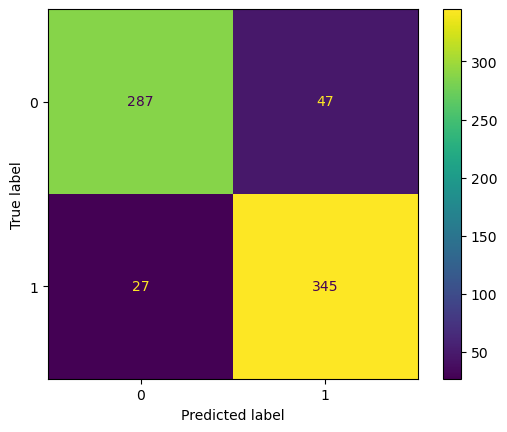

In [39]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=svm.classes_)
cm_display.plot()

In [40]:
import pickle
pickle.dump(svm, open("svm_class.sav", 'wb'))